In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as go
import holidays
import seaborn as sns

In [3]:
energy = pd.read_csv("D:/GitHub_Web/energy/src/data/processed/combined_data.csv")
energy["SETTLEMENTDATE"] = pd.to_datetime(energy["SETTLEMENTDATE"])
energy

,SETTLEMENTDATE,TOTALDEMAND,RRP,Weekday,Holiday,Hour,Minute,Time,Day,Month
0,2018-01-01 00:30:00,4251.18,92.46,Monday,True,0,30,0.5,1,1
1,2018-01-01 01:00:00,4092.53,87.62,Monday,True,1,0,1.0,1,1
2,2018-01-01 01:30:00,3958.95,73.08,Monday,True,1,30,1.5,1,1
3,2018-01-01 02:00:00,3785.27,70.18,Monday,True,2,0,2.0,1,1
4,2018-01-01 02:30:00,3673.72,67.43,Monday,True,2,30,2.5,1,1
...,...,...,...,...,...,...,...,...,...,...
105163,2023-12-31 22:00:00,3810.70,44.20,Sunday,False,22,0,22.0,31,12
105164,2023-12-31 22:30:00,3858.55,48.64,Sunday,False,22,30,22.5,31,12
105165,2023-12-31 23:00:00,3974.08,49.99,Sunday,False,23,0,23.0,31,12
105166,2023-12-31 23:30:00,4057.02,51.40,Sunday,False,23,30,23.5,31,12


In [4]:
energy_2018 = energy[energy["SETTLEMENTDATE"].dt.year == 2018]
energy_2019 = energy[energy["SETTLEMENTDATE"].dt.year == 2019]
energy_2020 = energy[energy["SETTLEMENTDATE"].dt.year == 2020]
energy_2021 = energy[energy["SETTLEMENTDATE"].dt.year == 2021]
energy_2022 = energy[energy["SETTLEMENTDATE"].dt.year == 2022]
energy_2023 = energy[energy["SETTLEMENTDATE"].dt.year == 2023]

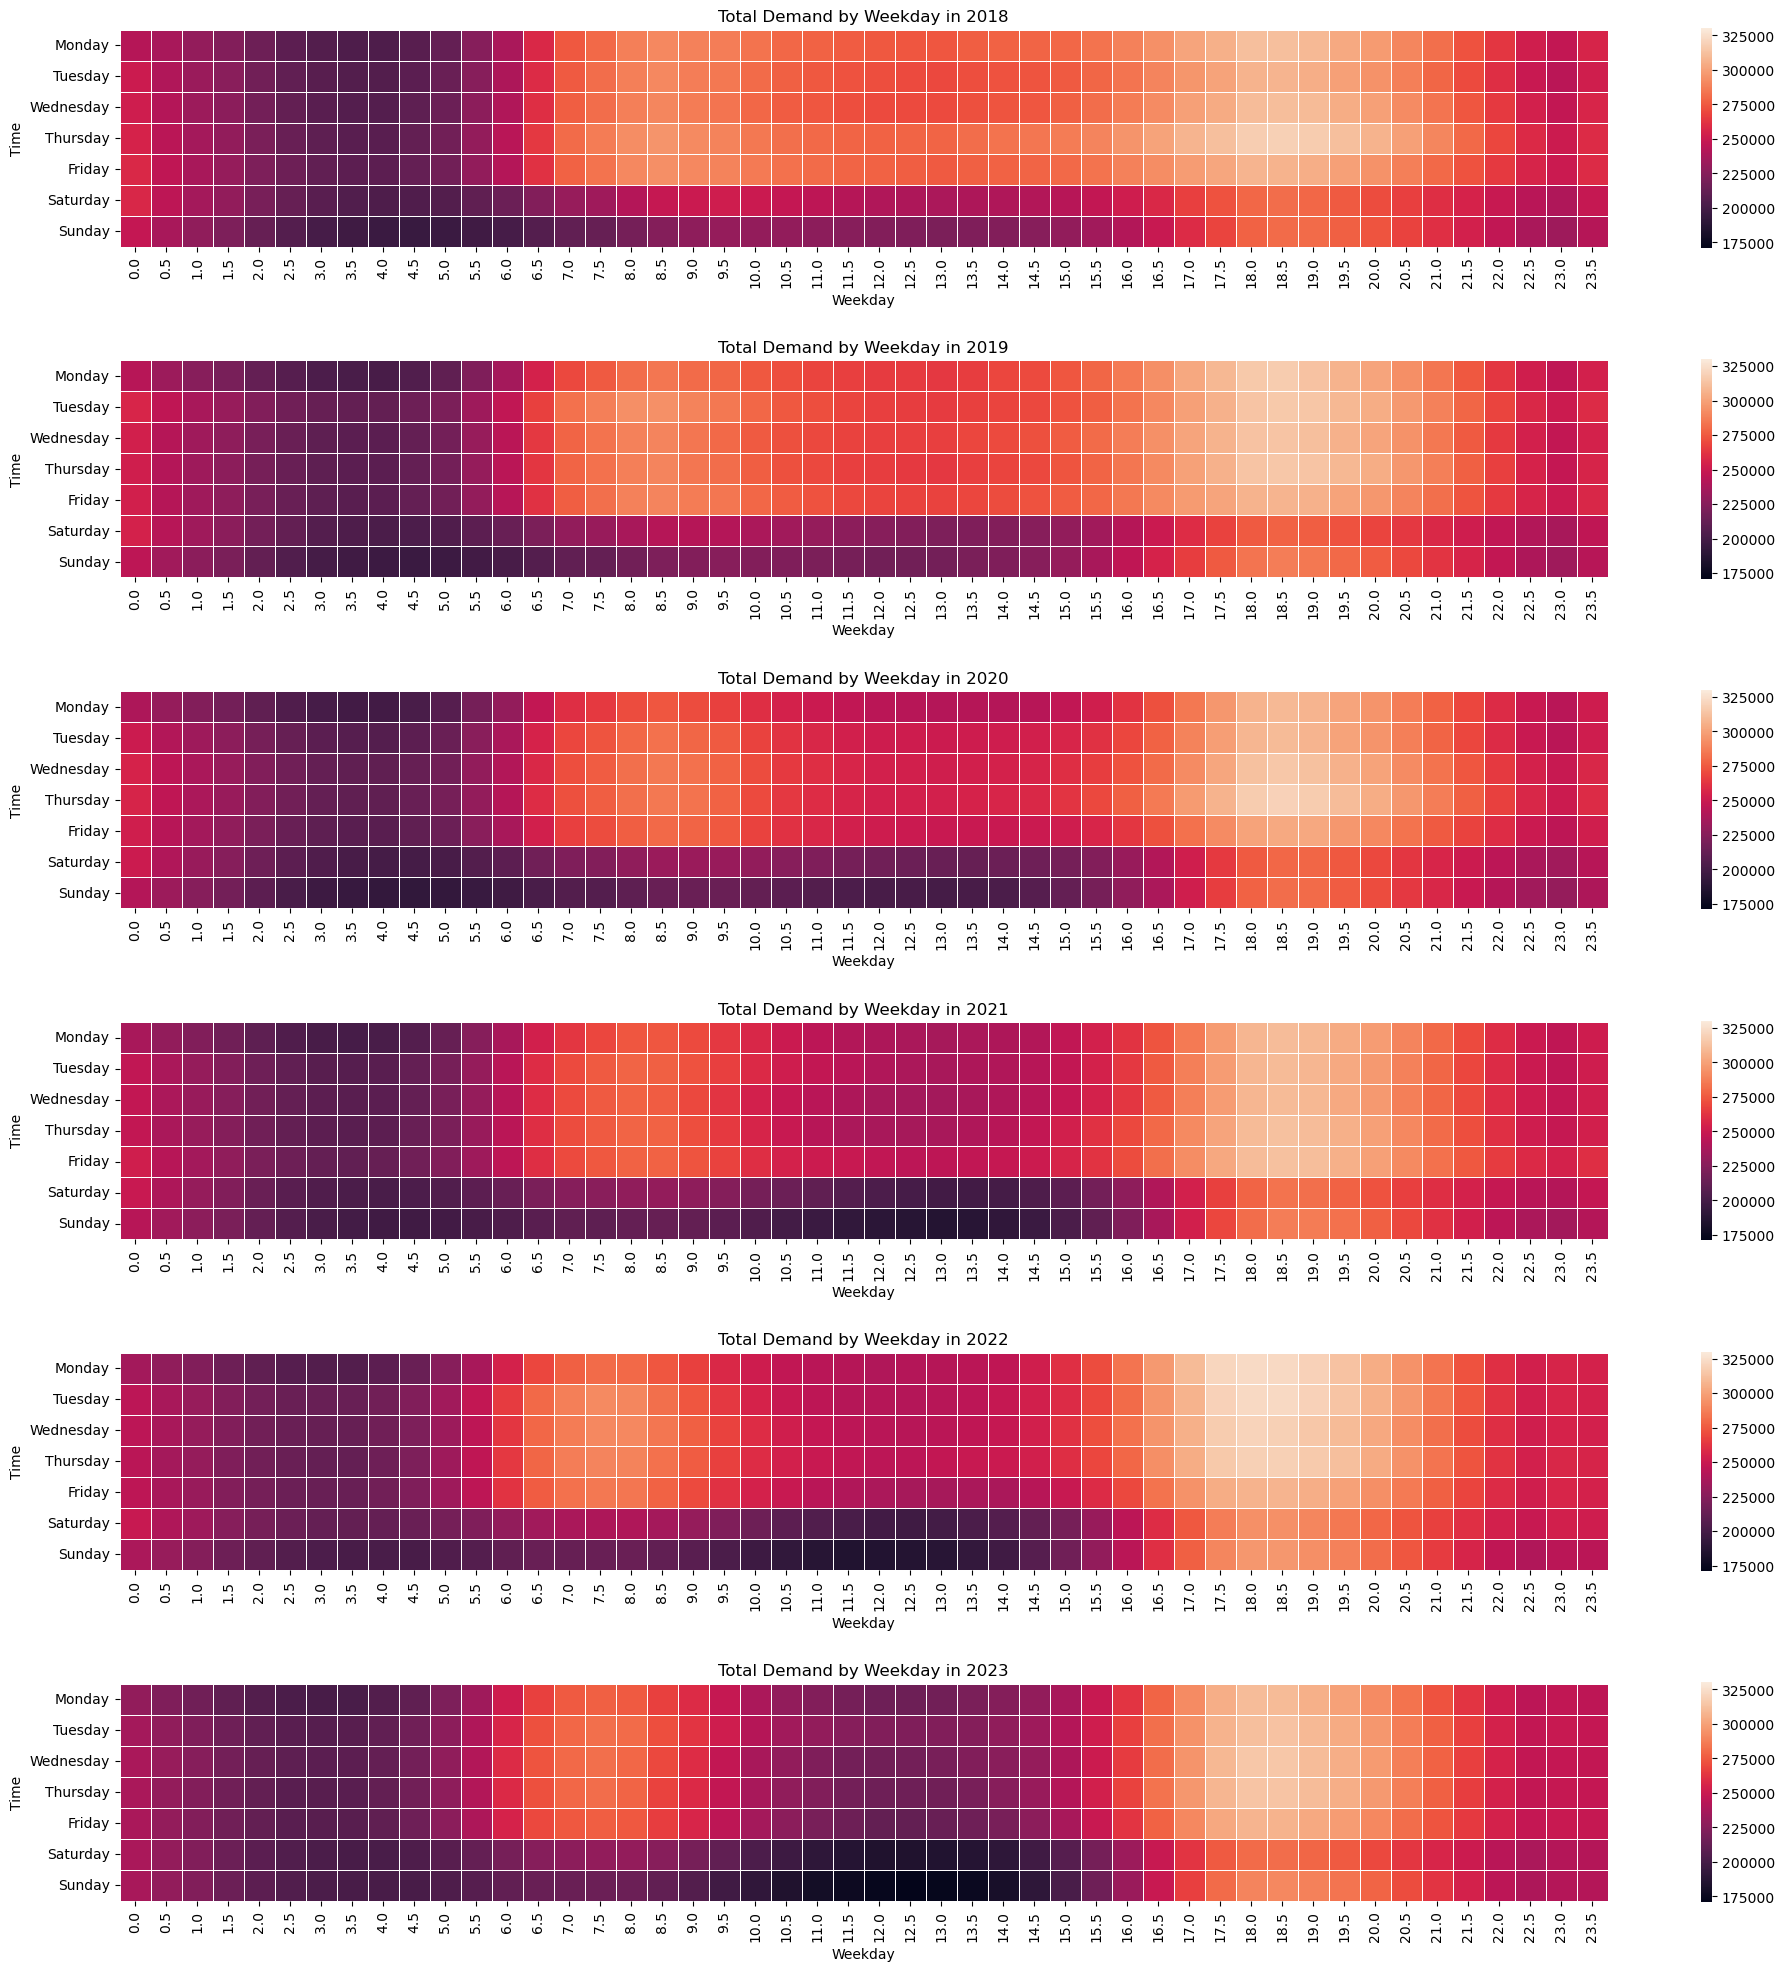

In [12]:
fig,ax = plt.subplots(6,1,figsize=(20,20))

for i, df in enumerate([energy_2018, energy_2019, energy_2020, energy_2021, energy_2022, energy_2023]):
    tem = pd.crosstab(df.Time, df.Weekday, values=df.TOTALDEMAND, aggfunc='sum')
    tem = tem.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    sns.heatmap(tem.T, ax=ax[i], cbar_kws={"shrink": 0.8},linewidths=0.5, linecolor='white', square=True, vmin = 171000, vmax = 330000)
    ax[i].set_title(f"Total Demand by Weekday in {2018 + i}")
    ax[i].set_ylabel("Weekday")
    ax[i].set_xlabel("Time")

plt.tight_layout()
plt.show()

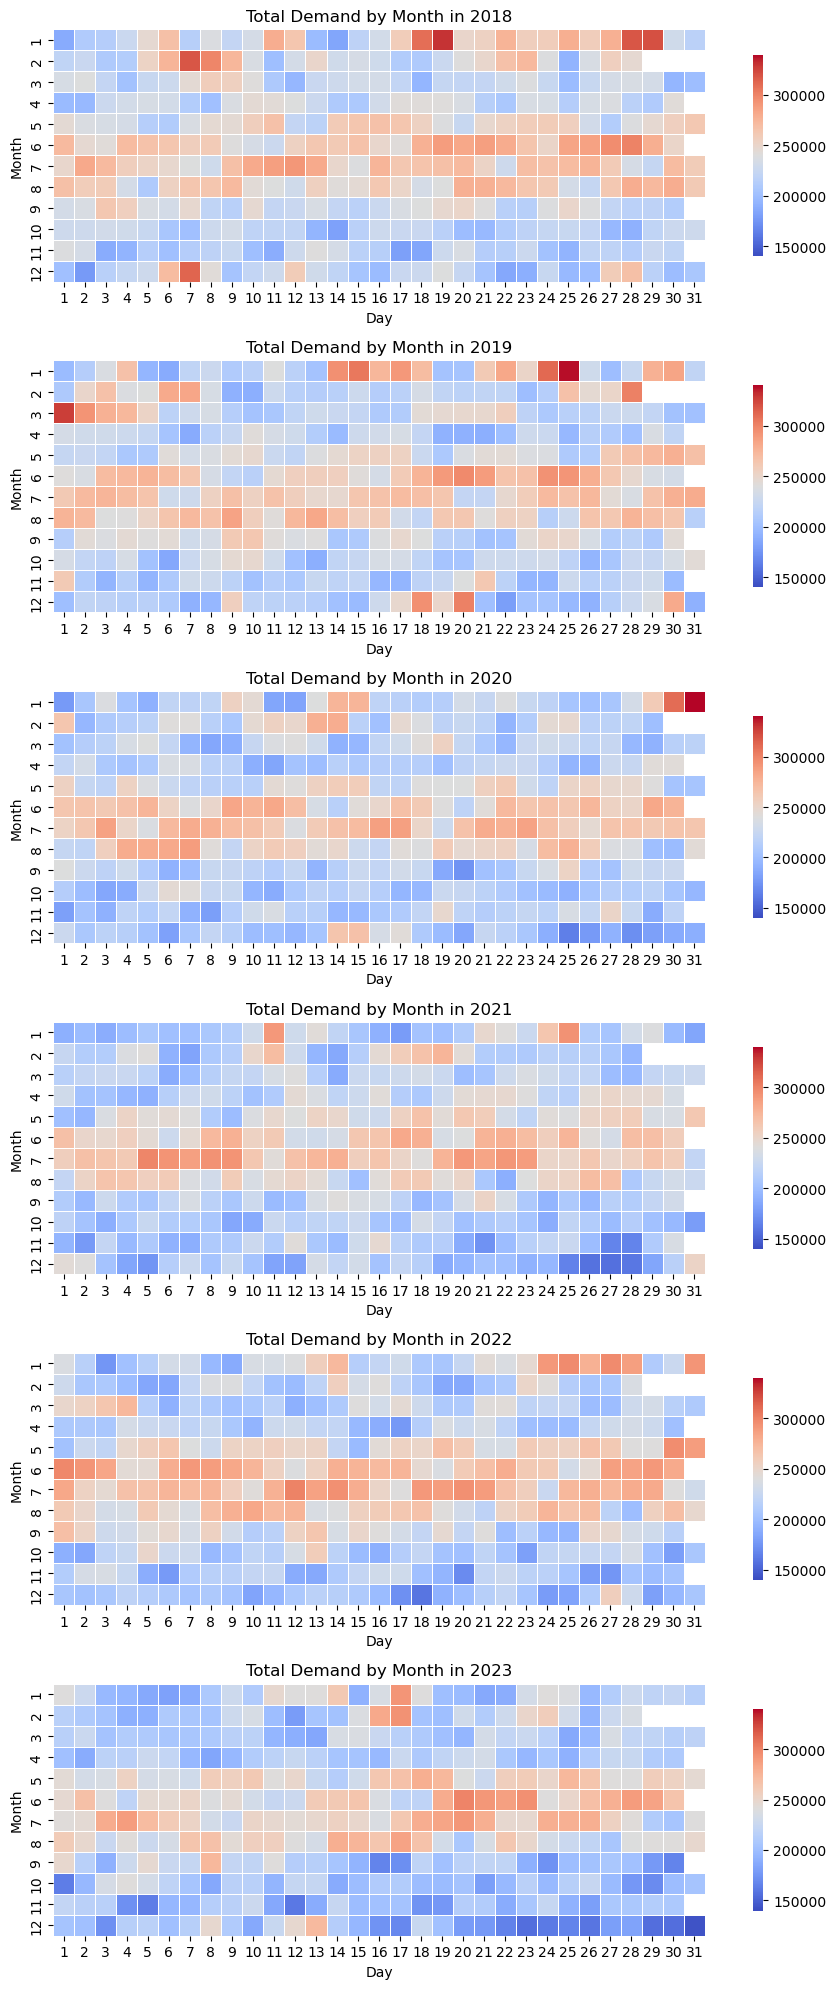

In [21]:
fig,ax = plt.subplots(6,1,figsize=(10,20))

for i, df in enumerate([energy_2018, energy_2019, energy_2020, energy_2021, energy_2022, energy_2023]):
    tem = pd.crosstab(df.Day, df.Month, values=df.TOTALDEMAND, aggfunc='sum')
    tem = tem.reindex(columns=[1,2,3,4,5,6,7,8,9,10,11,12])
    sns.heatmap(tem.T, ax=ax[i], cbar_kws={"shrink": 0.8},linewidths=0.5, linecolor='white', square=True, cmap='coolwarm', vmax = 340000, vmin = 140000)
    ax[i].set_title(f"Total Demand by Month in {2018 + i}")
    ax[i].set_ylabel("Month")
    ax[i].set_xlabel("Day")

plt.tight_layout()
plt.show()

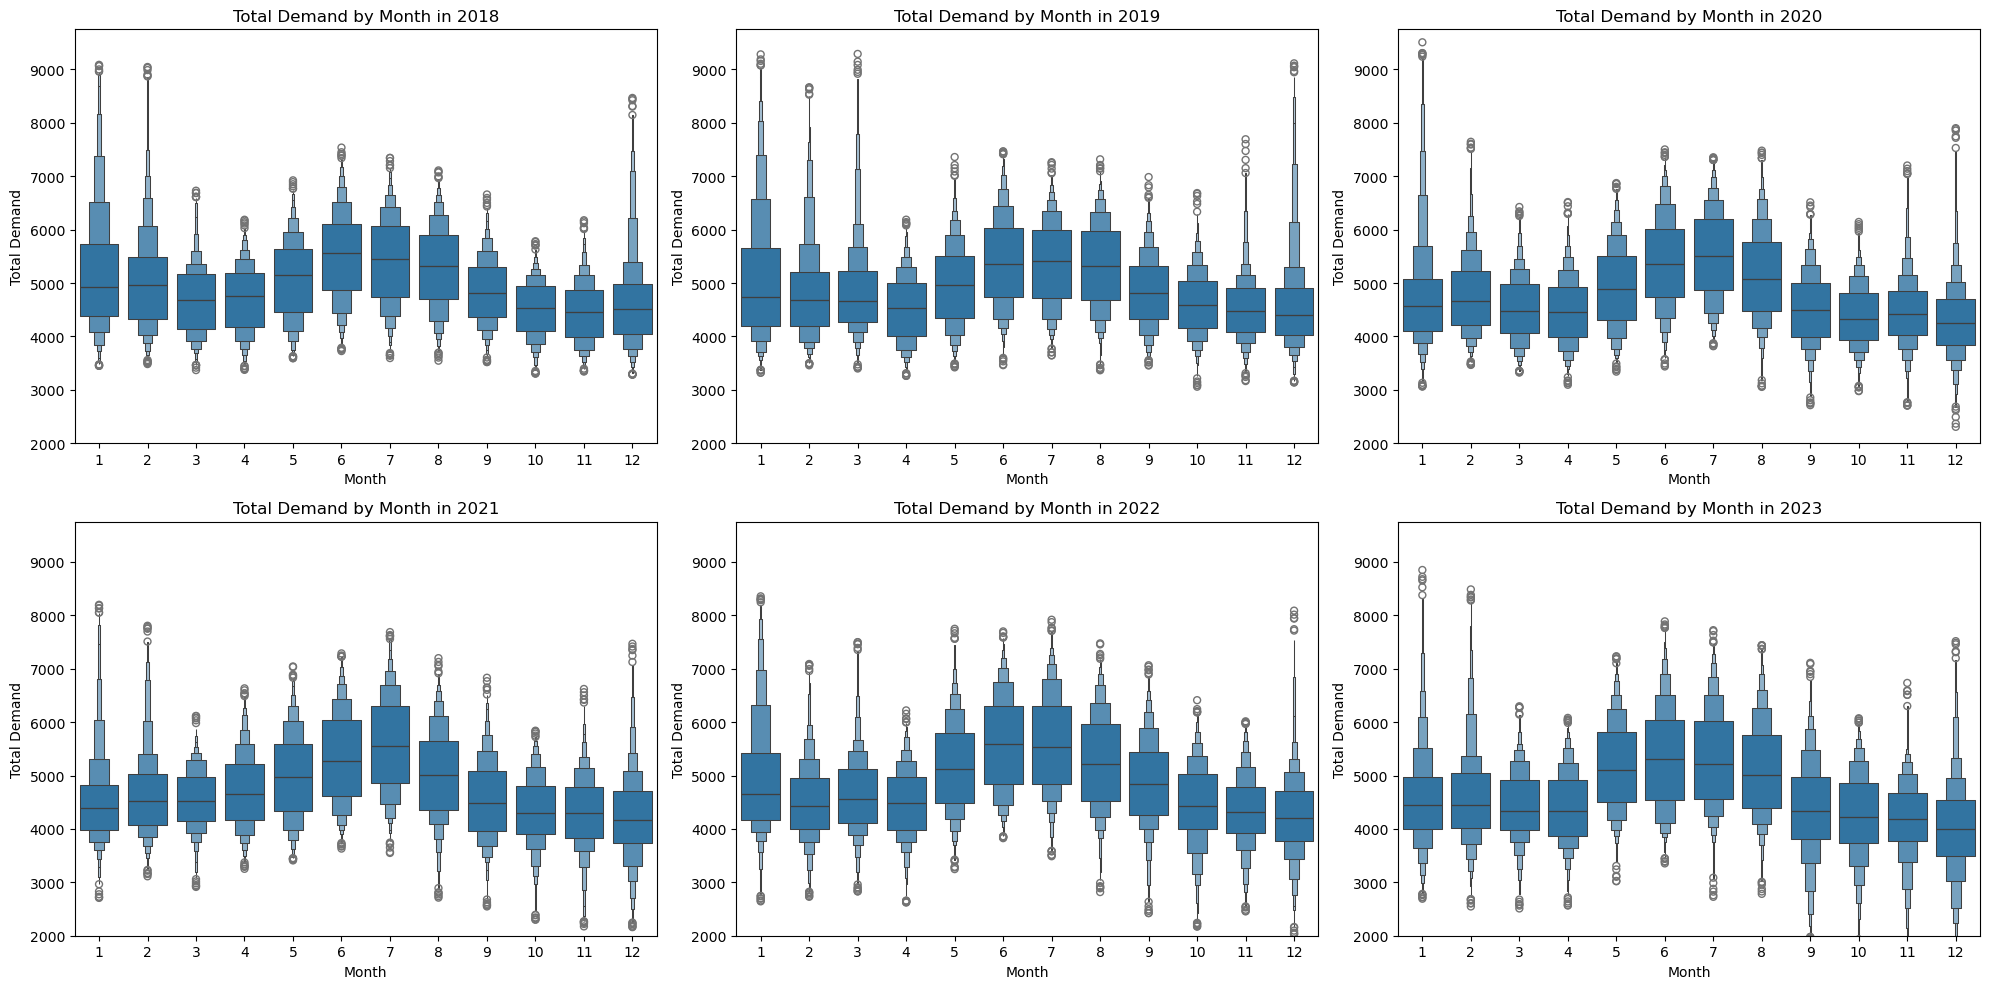

In [26]:
fig,ax = plt.subplots(2,3,figsize=(20,10))

for i, df in enumerate([energy_2018, energy_2019, energy_2020, energy_2021, energy_2022, energy_2023]):
    sns.boxenplot(x=df.Month, y=df.TOTALDEMAND, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f"Total Demand by Month in {2018 + i}")
    ax[i//3, i%3].set_ylabel("Total Demand")
    ax[i//3, i%3].set_xlabel("Month")
    ax[i//3, i%3].set_ylim(2000, 9750)

plt.tight_layout()
plt.show()